In [1]:
#importing all neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style

In [2]:
#loading the data
df=pd.read_csv(r'C:\Users\Preeti\Downloads\SampleSuperstore.csv')

In [3]:
#viewing the sample data
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
#Shape of the dataframe
df.shape

(9994, 13)

In [5]:
#columns in the dataframe
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [6]:
# information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


#### We need to change the data type of the postal code 

In [7]:
# basic stats of the dataset
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [8]:
#checking for the duplicates
df.duplicated().sum()

17

#### It has 17 duplicate values which we have to remove from the dataset

In [9]:
#checking for the null value
df.isnull().values.sum()

0

#### It has no null value

In [10]:
# changing the data-type of postal code , since we don't want to perform any operations with the Postal code 
df['Postal Code'] = df['Postal Code'].astype('object')

In [11]:
# removing the duplicates out of the dataset
df.drop_duplicates(subset = None , keep = 'first' , inplace = True  )

In [12]:
# cecking for the duplicates again
df.duplicated().sum()

0

<AxesSubplot:>

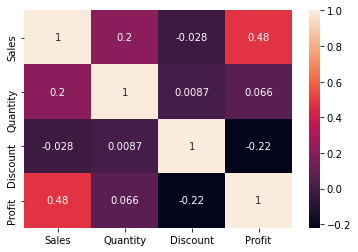

In [13]:
# cheecking the correlations between the different attributes of the dataset
corr = df.corr()
sns.heatmap(corr,annot = True)

##### It turns out that Profit and Sales have quite stong correlation 

In [14]:
#dropping the Country and Postal Code out of the dataset , Since they are of no use .
df = df.drop(['Country' , 'Postal Code'],axis = 1)

In [15]:
# changing the datatype of Quantity
df['Quantity'] = df['Quantity'].astype('float')


<AxesSubplot:xlabel='Sales', ylabel='Profit'>

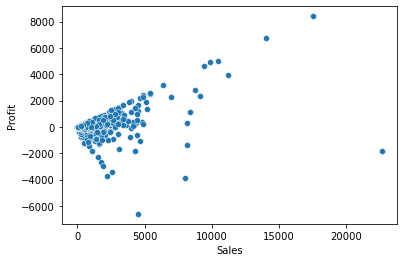

In [70]:
# scatterplot between Sales and Profit
sns.scatterplot(data = df , x = 'Sales' , y ='Profit')

<AxesSubplot:xlabel='Discount', ylabel='Profit'>

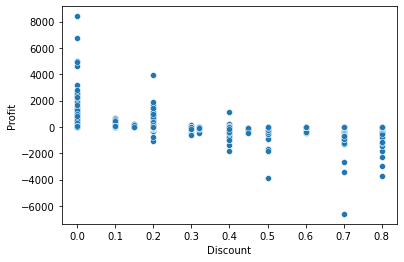

In [71]:
#scatterplot between Discount and Profit
sns.scatterplot(data = df , x = 'Discount' , y = 'Profit')

<AxesSubplot:xlabel='Discount', ylabel='Profit'>

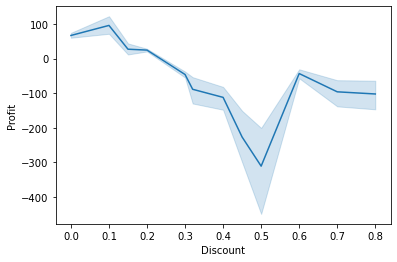

In [72]:
# lineplot between Discount and Profit
sns.lineplot(data = df , x = 'Discount' , y = 'Profit')

<AxesSubplot:xlabel='Quantity', ylabel='Profit'>

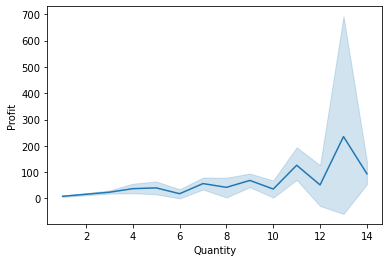

In [73]:
# lineplot between Quantity and Profit 
sns.lineplot(data = df , x = 'Quantity' , y = 'Profit')

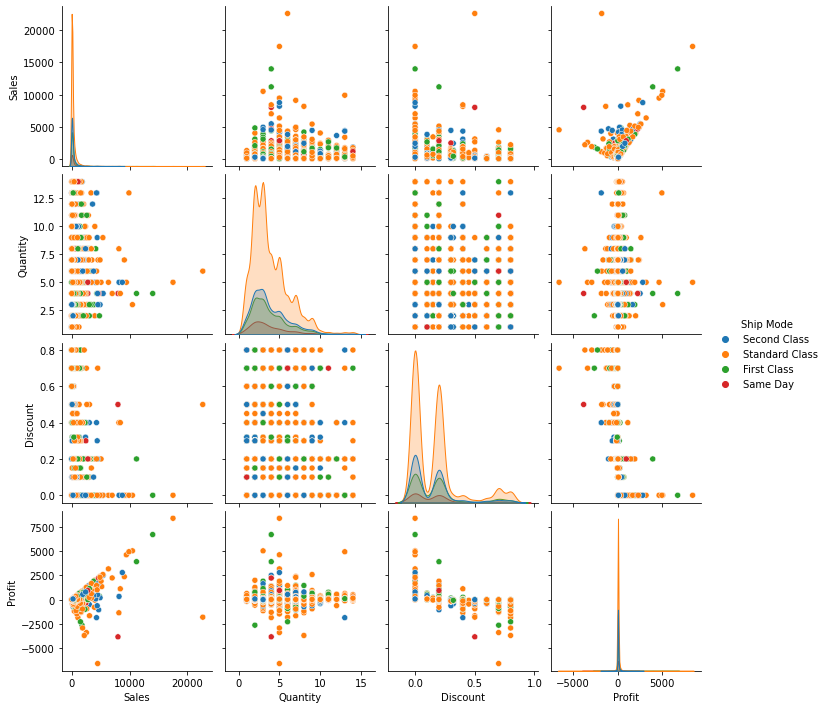

In [16]:
# Pair plot between different attributes of the dataset
sns.pairplot(df , hue = 'Ship Mode')

In [17]:
df['Ship Mode'].value_counts()

Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: Ship Mode, dtype: int64

<AxesSubplot:ylabel='Ship Mode'>

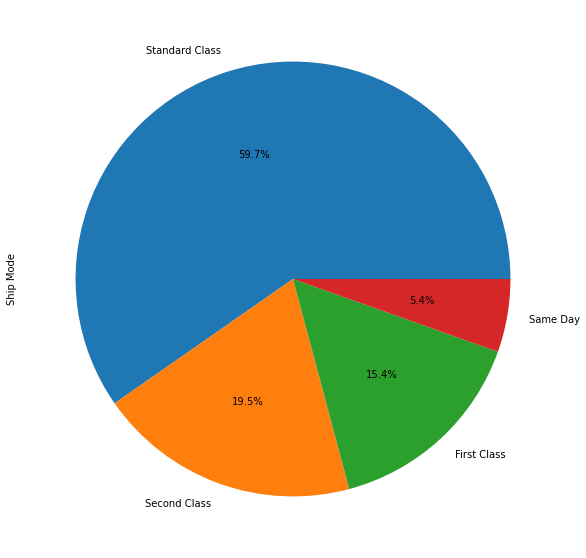

In [49]:
#piechart for the ship mode
plt.subplots(figsize = (12,10))
df['Ship Mode'].value_counts().plot.pie(autopct="%.1f%%")

In [18]:
df['Segment'].value_counts()

Consumer       5183
Corporate      3015
Home Office    1779
Name: Segment, dtype: int64

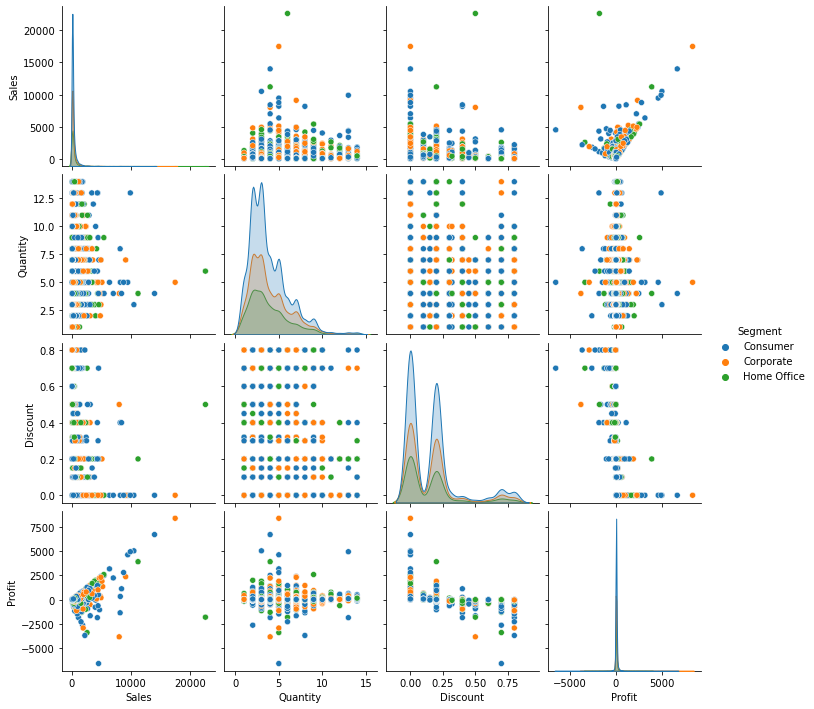

In [19]:
sns.pairplot(df , hue = 'Segment')

<AxesSubplot:ylabel='Segment'>

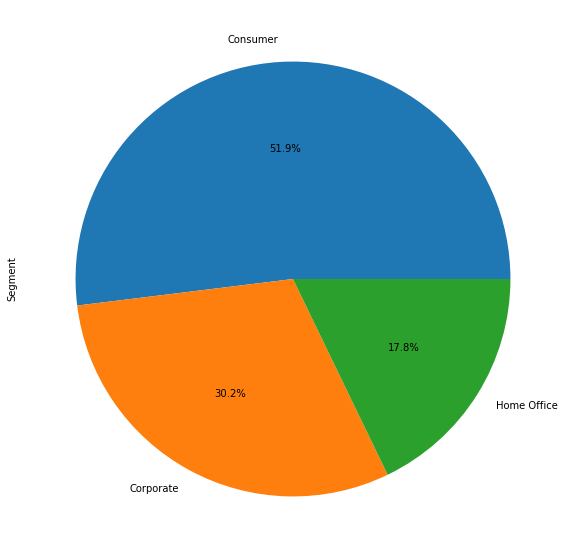

In [48]:
#piechart for the Sement
plt.subplots(figsize = (12,10))
df['Segment'].value_counts().plot.pie(autopct="%.1f%%")

In [50]:
df['State'].value_counts()

California              1996
New York                1127
Texas                    983
Pennsylvania             586
Washington               502
Illinois                 491
Ohio                     468
Florida                  383
Michigan                 254
North Carolina           249
Virginia                 224
Arizona                  224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   123
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Missouri                  66
Oklahoma                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
South Carolina            42
Louisiana                 42
Nevada        

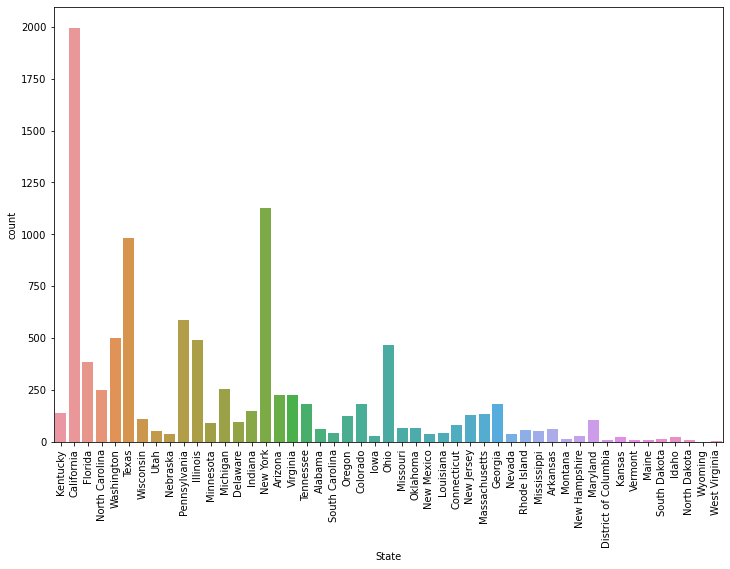

In [33]:
#barchart for the states
plt.subplots(figsize = (12,8))
sns.countplot(data= df , x = 'State')
plt.xticks(rotation = 90);

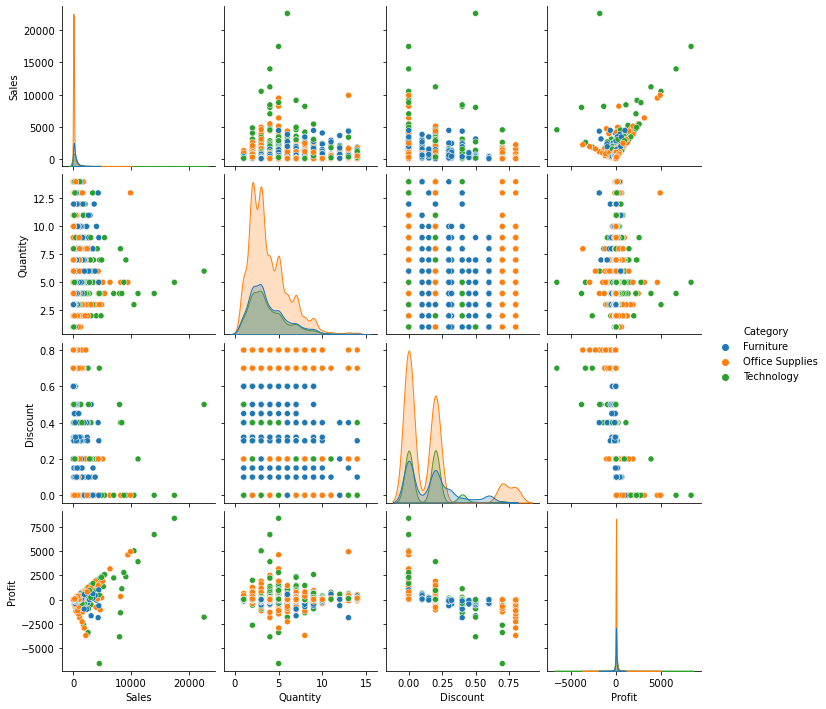

In [34]:
sns.pairplot(df , hue = 'Category')

<AxesSubplot:ylabel='Category'>

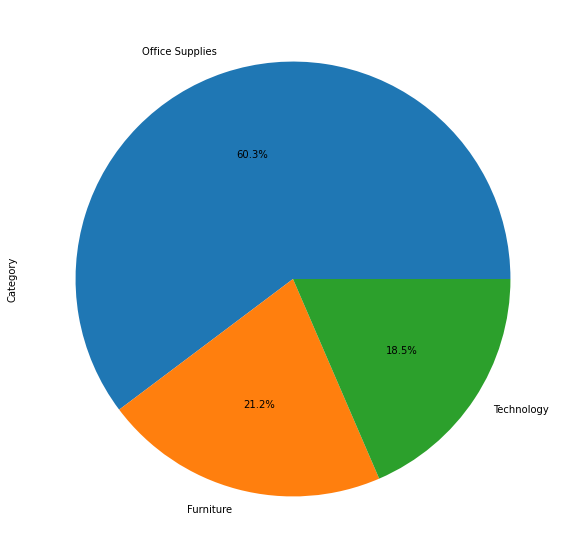

In [47]:
#piechart for the category
plt.subplots(figsize = (12,10))
df['Category'].value_counts().plot.pie(autopct="%.1f%%")

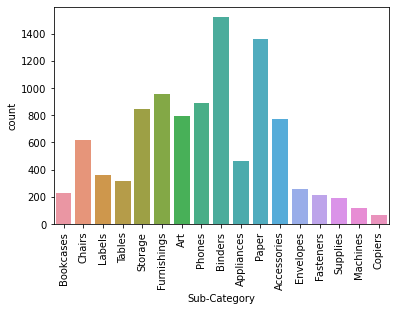

In [39]:
# barchart for the Sub-Category
sns.countplot(data = df , x = 'Sub-Category')
plt.xticks(rotation = 90);

<AxesSubplot:ylabel='Region'>

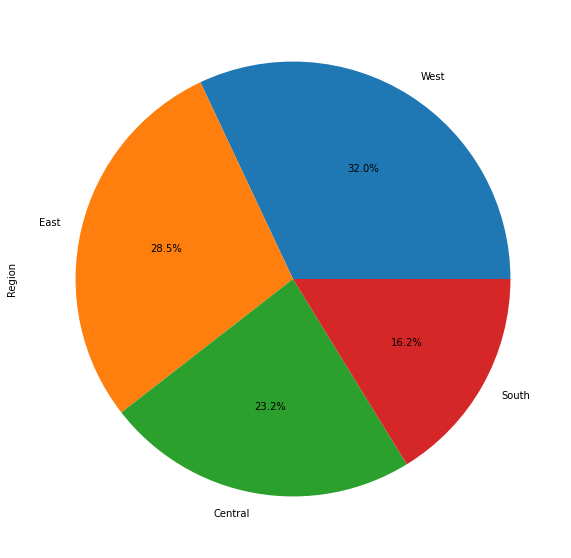

In [51]:
#piechart for the Region
plt.subplots(figsize = (12,10))
df['Region'].value_counts().plot.pie(autopct="%.1f%%")

<AxesSubplot:xlabel='Segment'>

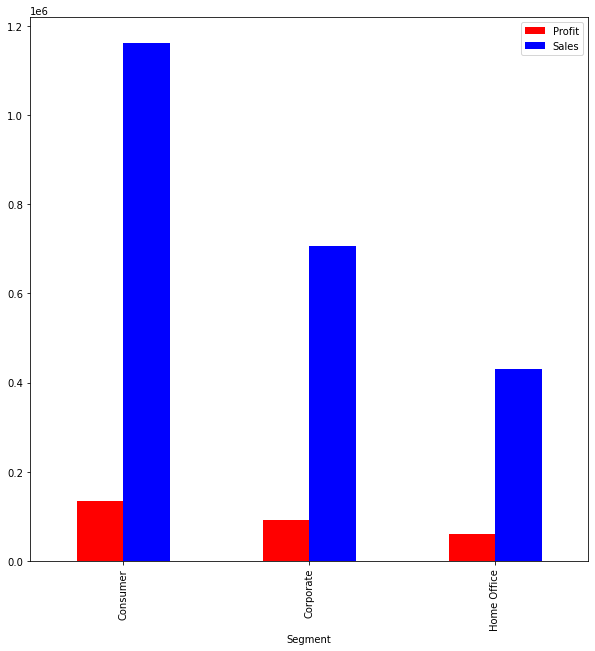

In [61]:
#barchart for the Profit and Sales grouped by Segment
df.groupby('Segment')[['Profit','Sales']].sum().plot.bar(color =['red','blue'],figsize = (10,10))

<AxesSubplot:xlabel='Region'>

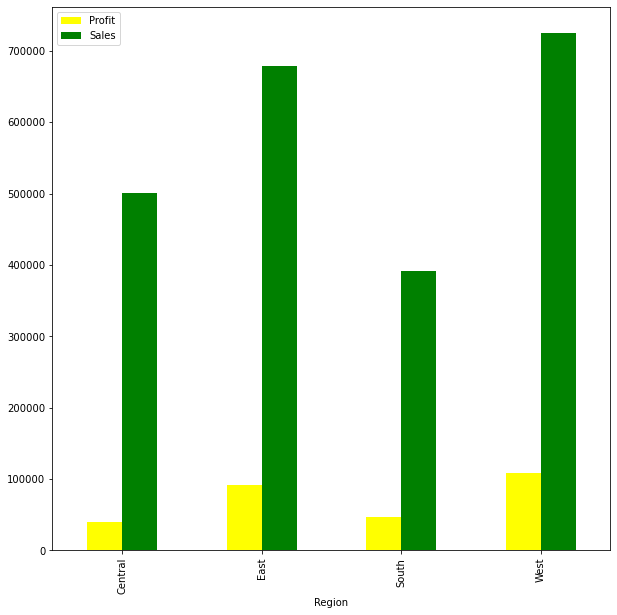

In [74]:
#barchart for the Profit and Sales grouped by Region
df.groupby('Region')[['Profit','Sales']].sum().plot.bar(color =['yellow','green'],figsize = (10,10))

<AxesSubplot:xlabel='State'>

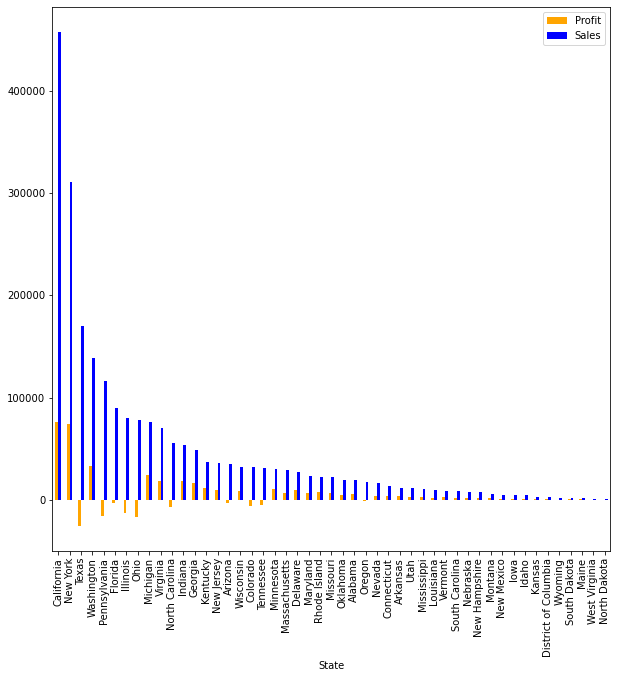

In [76]:
#barchart for the Profit and Sales grouped by State
df.groupby('State')[['Profit','Sales']].sum().sort_values(by = 'Sales',ascending = False).plot.bar(color =['orange','blue'],figsize = (10,10))

<AxesSubplot:xlabel='Category'>

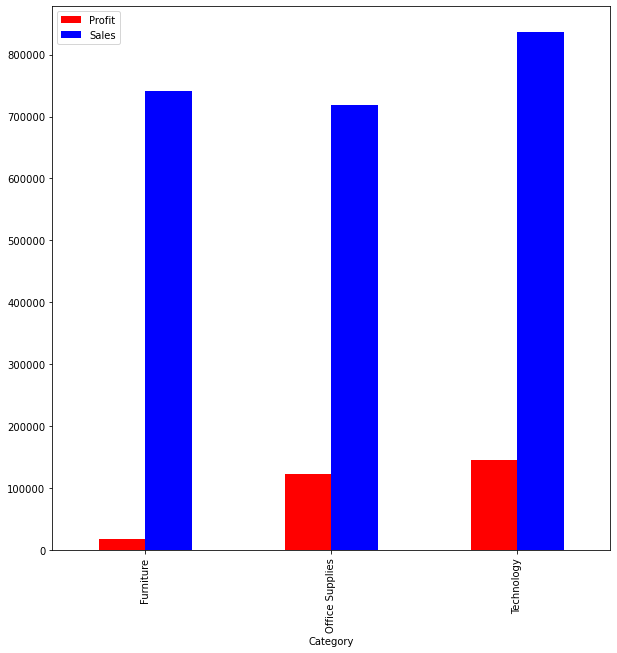

In [79]:
#barchart for the Profit and Sales grouped by Category
df.groupby('Category')[['Profit','Sales']].sum().plot.bar(color =['red','blue'],figsize = (10,10))

<AxesSubplot:xlabel='Sub-Category'>

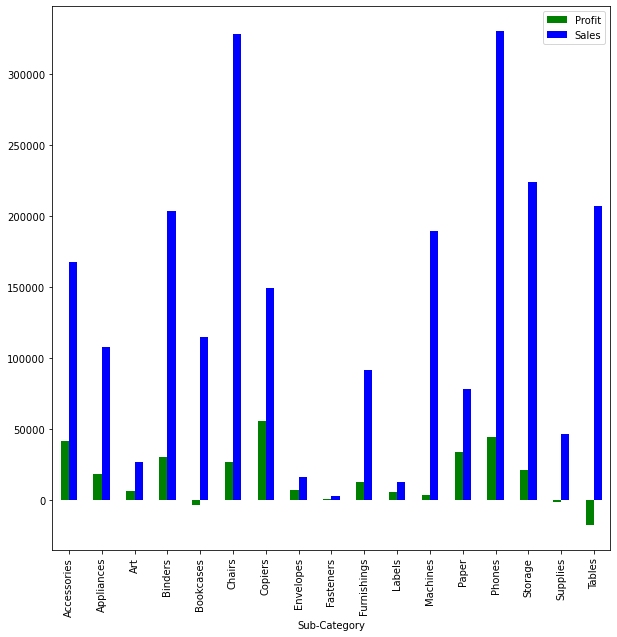

In [80]:
#barchart for the Profit and Sales grouped by Sub-Category
df.groupby('Sub-Category')[['Profit','Sales']].sum().plot.bar(color =['green','blue'],figsize = (10,10))